In [1]:
%matplotlib inline

import os
# assumes jupyter server launched from root dir of repo
filepath = os.path.abspath(os.path.join(os.getcwd(), '..'))
%cd $filepath

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sys
sys.path.append(os.path.abspath(filepath))

from common import *
from cces_util import *
from notebooks.eval_util import *

/Users/cyz/survey/active_survey


Using TensorFlow backend.


In [2]:
# Suppress verbose warnings about missing fonts
import warnings
warnings.simplefilter('ignore')

In [3]:
metadata_filename = filepath + "/data/cces/CCES16_Common_OUTPUT_Feb2018_VV-ddi.xml"
question_to_label = parse_question_metadata(metadata_filename)

In [4]:
question_filename = filepath + "/data/cces/cces16_questions_short.csv"
question_df = pd.read_csv(question_filename, index_col=0)
question_to_short_label = {row['question']: row['text'] for index, row in question_df.iterrows()}
question_to_label.update(question_to_short_label)

In [5]:
datasets = [
    'cces16_base',
    'cces16_with_pol_ids',
    'cces16_with_demos',
    'cces16_full',
]

Extracting cache for 1 simulations
Extracting cache for 10 simulations
Extracting cache for 1 simulations
Extracting cache for 10 simulations
Extracting cache for 1 simulations
Extracting cache for 10 simulations
Extracting cache for 1 simulations
Extracting cache for 10 simulations


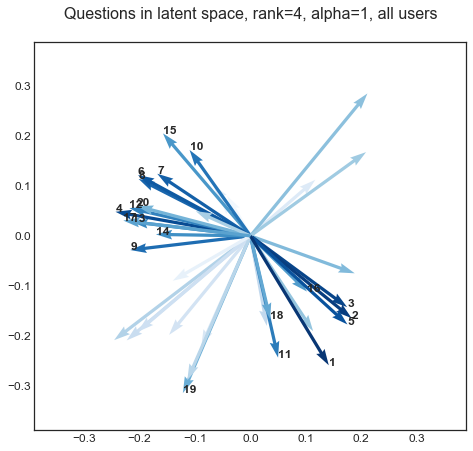

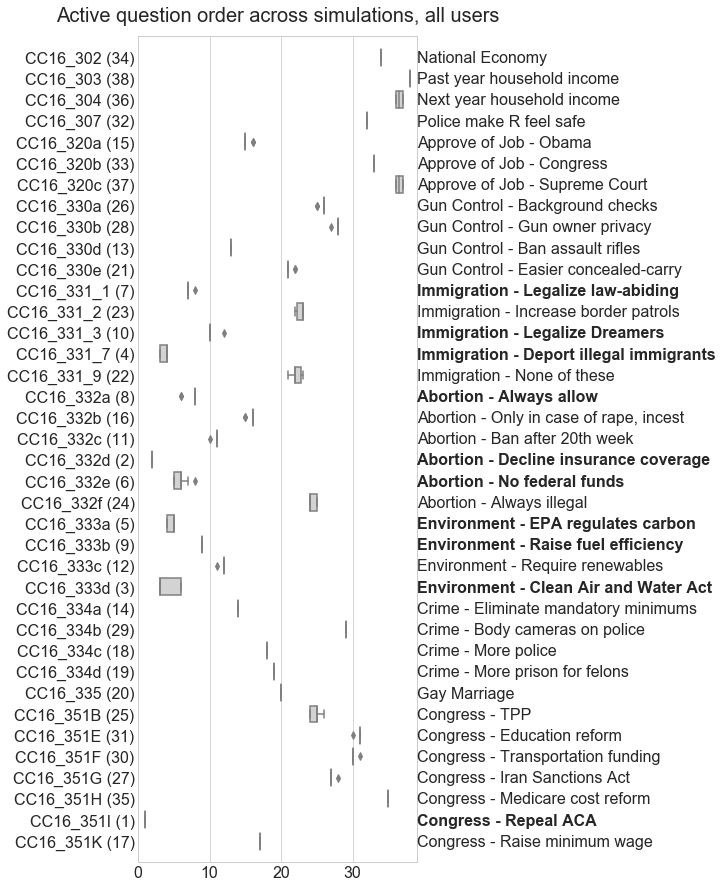

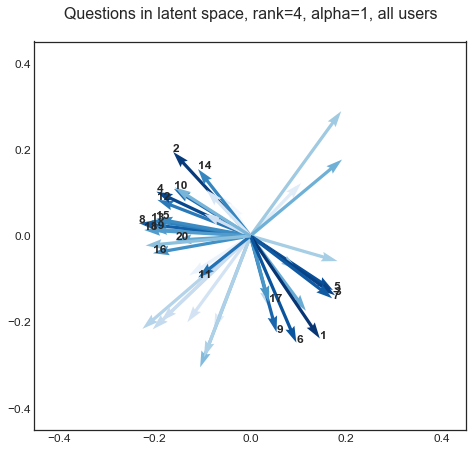

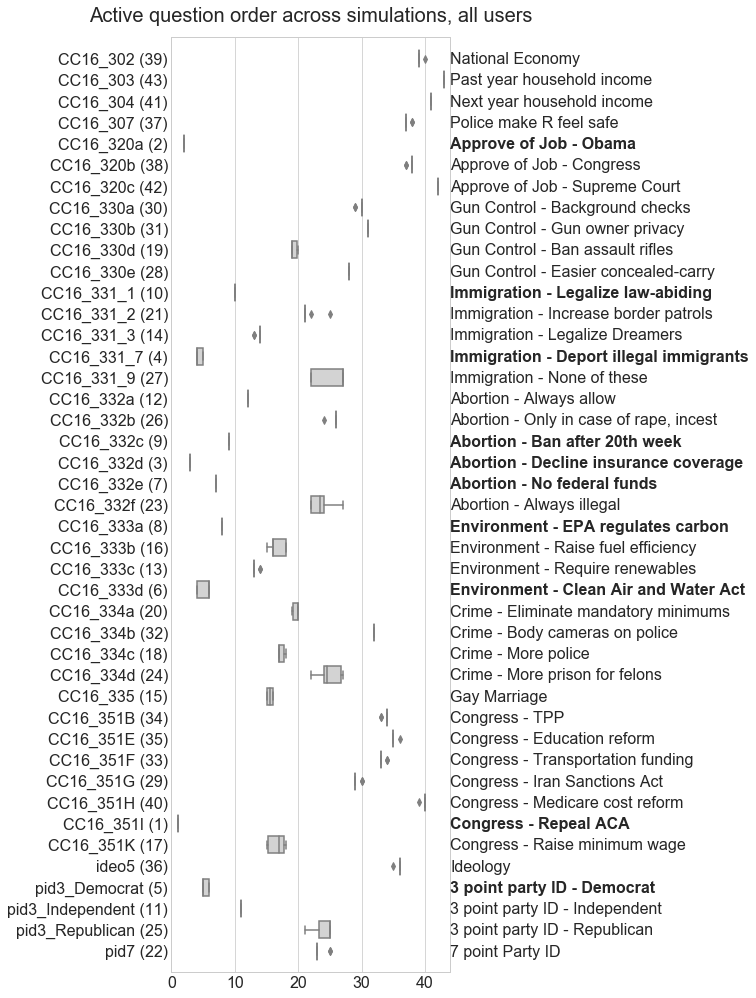

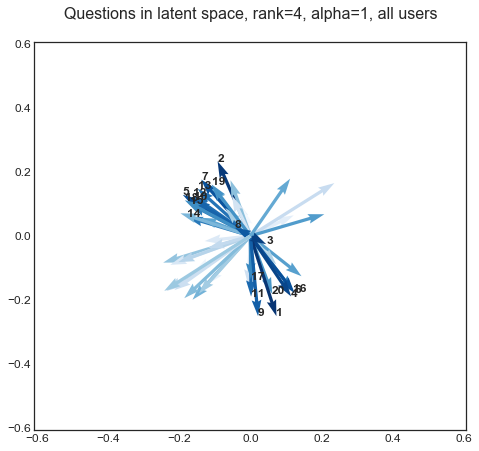

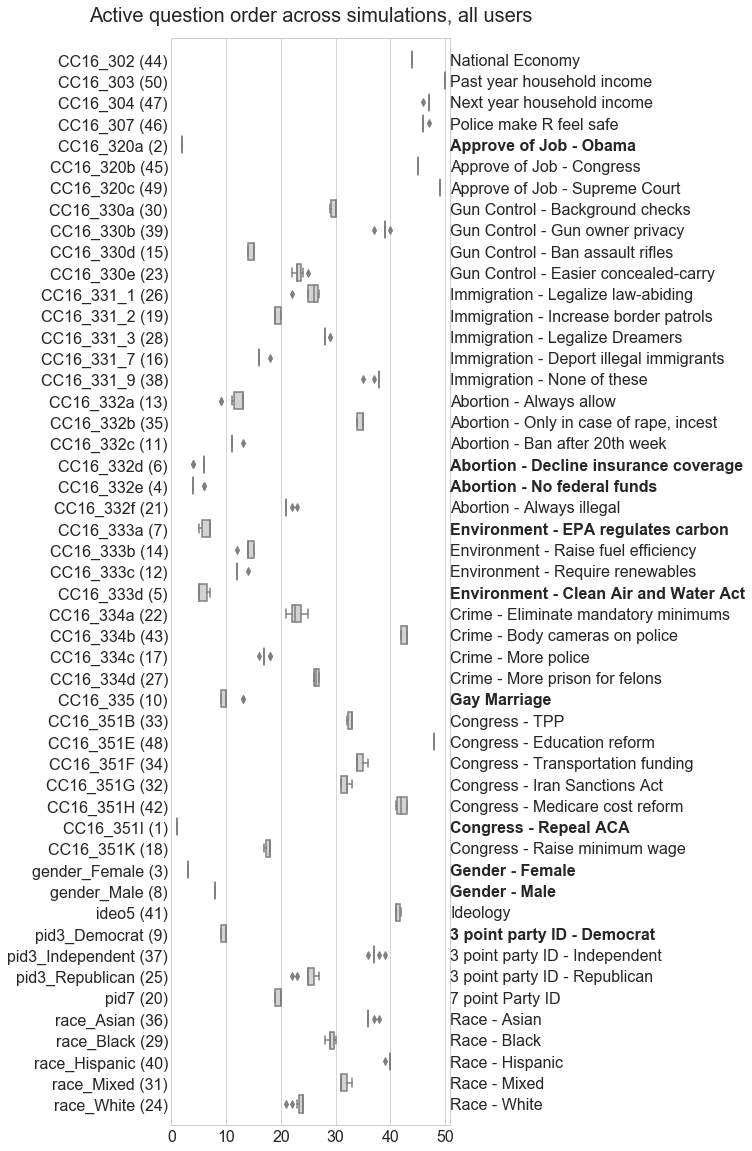

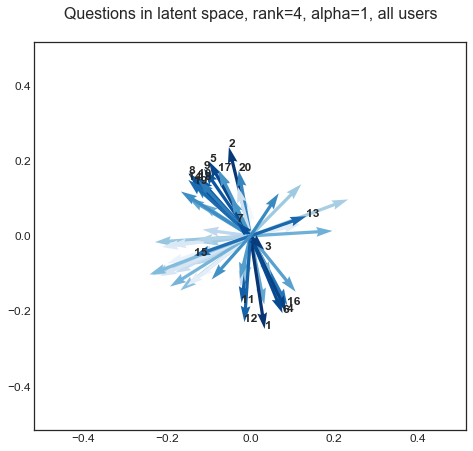

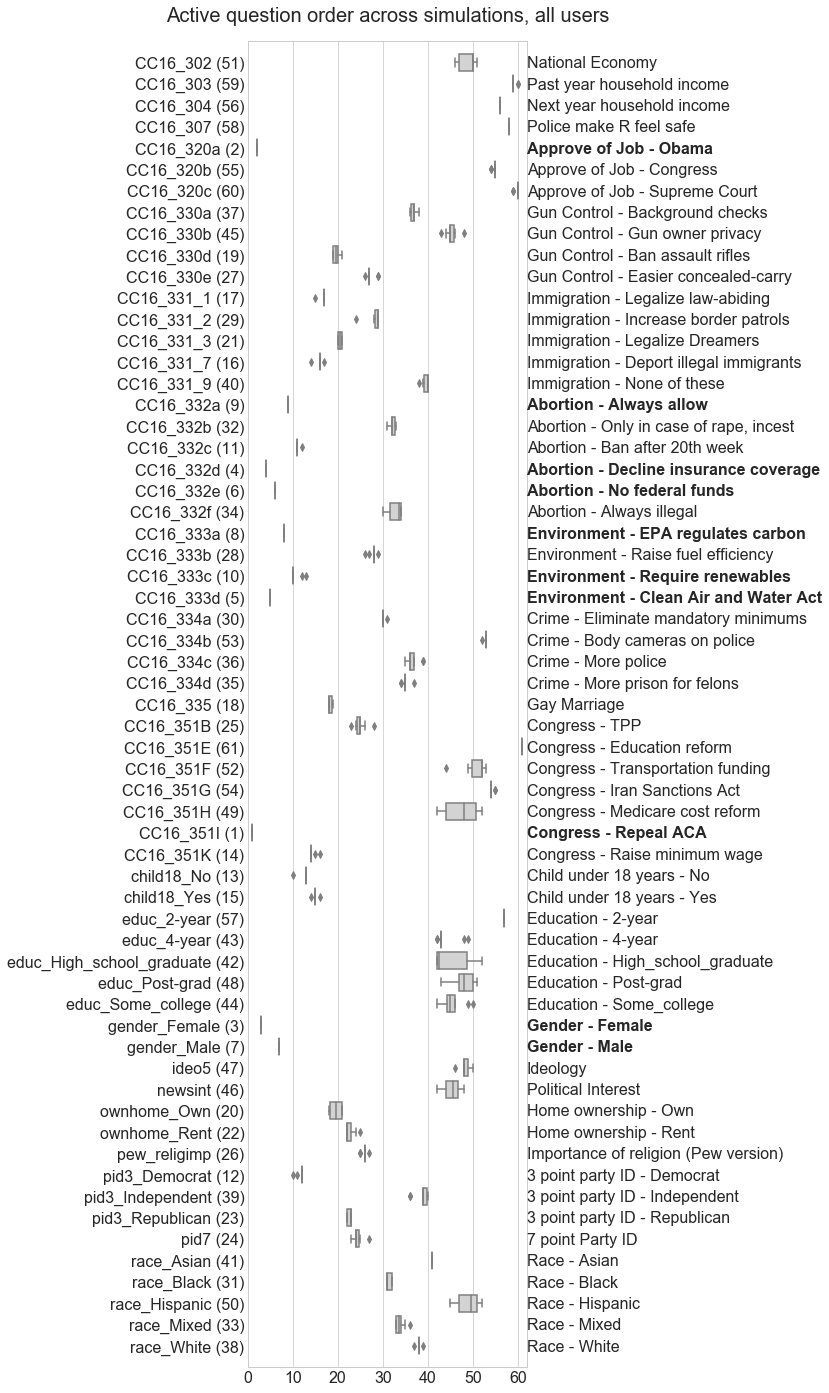

In [6]:
alpha = 1

for dataset in datasets:
    sim_objects_filename = '{}/data/{}-sim-objects.pkl'.format(filepath, dataset)
    sim_objects = deserialize(sim_objects_filename)
    
    response_filename = '{}/data/cces/{}_cs.csv'.format(filepath, dataset)
    responses = pd.read_csv(response_filename, index_col=0)
    questions = responses.columns.tolist()

    plt.style.use('ggplot')
    plt.rcParams.update({'font.size': 12})
    plot_question_order(sim_objects, questions,
                        rank=4, optimality_type='A', v_method='row-norm', alpha=alpha,
                        max_labels=20, max_plots=1)
    
    plot_question_ranks(sim_objects, questions,
                        rank=4, optimality_type='A', v_method='row-norm', alpha=alpha,
                        show_question_labels=True, question_to_label=question_to_label, 
                        sort_by_rank=False)